In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
CPU_UTILIZATION_PER_USER_PROCESSOR = (3.56 / 5) / 100  
CPU_UTILIZATION_PER_USER_INFERENCE_PIPELINE = (2.97 / 5) / 100  
CONSERVATIVE_THRESHOLD = 0.80  
RISKY_THRESHOLD = 1.0  
EC2_INSTANCE_COST = 0.007 * 24 * 30  
VPC_COST = 23.80  
ELB_COST = 28.74 

def compute_instances_needed(users, cpu_utilization_per_user, threshold):
    total_utilization = cpu_utilization_per_user * users
    instances_needed = np.ceil(total_utilization / threshold)
    return int(instances_needed)

def compute_ec2_cost(users, cpu_utilization_per_user, threshold, ec2_instance_cost):
    instances_needed = compute_instances_needed(users, cpu_utilization_per_user, threshold)
    total_cost = instances_needed * ec2_instance_cost
    return total_cost, instances_needed

def compute_total_cost(users, cpu_utilization_per_user_processor, cpu_utilization_per_user_inference_pipeline, 
                       conservative_threshold, risky_threshold, ec2_instance_cost, vpc_cost, elb_cost):

    processor_conservative_cost, processor_conservative_instances = compute_ec2_cost(users, 
                                                                                      cpu_utilization_per_user_processor, 
                                                                                      conservative_threshold, 
                                                                                      ec2_instance_cost)
    processor_risky_cost, processor_risky_instances = compute_ec2_cost(users, 
                                                                       cpu_utilization_per_user_processor, 
                                                                       risky_threshold, 
                                                                       ec2_instance_cost)
    
    inference_conservative_cost, inference_conservative_instances = compute_ec2_cost(users, 
                                                                                      cpu_utilization_per_user_inference_pipeline, 
                                                                                      conservative_threshold, 
                                                                                      ec2_instance_cost)
    inference_risky_cost, inference_risky_instances = compute_ec2_cost(users, 
                                                                       cpu_utilization_per_user_inference_pipeline, 
                                                                       risky_threshold, 
                                                                       ec2_instance_cost)
    
    total_conservative_cost = processor_conservative_cost + inference_conservative_cost + vpc_cost + elb_cost
    total_risky_cost = processor_risky_cost + inference_risky_cost + vpc_cost + elb_cost
    
    total_conservative_instances = processor_conservative_instances + inference_conservative_instances
    total_risky_instances = processor_risky_instances + inference_risky_instances
    
    return total_conservative_cost, total_risky_cost, total_conservative_instances, total_risky_instances

user_counts = np.arange(1, 100001)

conservative_costs = []
risky_costs = []

for users in user_counts:
    conservative_cost, risky_cost, _, _ = compute_total_cost(users, 
                                                             CPU_UTILIZATION_PER_USER_PROCESSOR, 
                                                             CPU_UTILIZATION_PER_USER_INFERENCE_PIPELINE, 
                                                             CONSERVATIVE_THRESHOLD, 
                                                             RISKY_THRESHOLD, 
                                                             EC2_INSTANCE_COST, 
                                                             VPC_COST, 
                                                             ELB_COST)
    conservative_costs.append(conservative_cost)
    risky_costs.append(risky_cost)

users_5 = 40000
conservative_cost_5, risky_cost_5, conservative_instances_5, risky_instances_5 = compute_total_cost(users_5, 
                                                                                                    CPU_UTILIZATION_PER_USER_PROCESSOR, 
                                                                                                    CPU_UTILIZATION_PER_USER_INFERENCE_PIPELINE, 
                                                                                                    CONSERVATIVE_THRESHOLD, 
                                                                                                    RISKY_THRESHOLD, 
                                                                                                    EC2_INSTANCE_COST, 
                                                                                                    VPC_COST, 
                                                                                                    ELB_COST)

print(f"For 5 users:")
print(f"Conservative Scenario Cost: ${conservative_cost_5:.2f}")
print(f"Risky Scenario Cost: ${risky_cost_5:.2f}")
print(f"Number of EC2 Instances Needed (Conservative): {conservative_instances_5}")
print(f"Number of EC2 Instances Needed (Risky): {risky_instances_5}")

For 5 users:
Conservative Scenario Cost: $3343.66
Risky Scenario Cost: $2688.46
Number of EC2 Instances Needed (Conservative): 653
Number of EC2 Instances Needed (Risky): 523


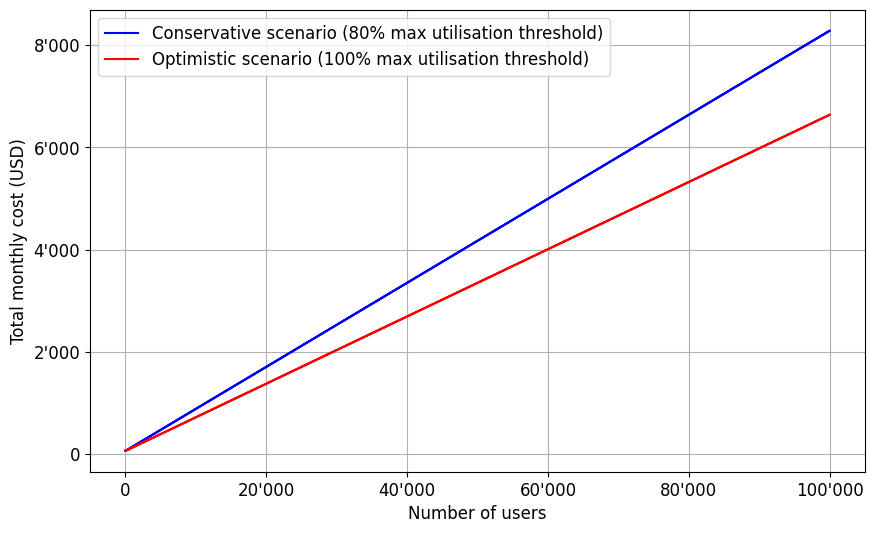

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(user_counts, conservative_costs, label="Conservative scenario (80% max utilisation threshold)", color='blue')
plt.plot(user_counts, risky_costs, label="Optimistic scenario (100% max utilisation threshold)", color='red')
plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Total monthly cost (USD)", fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "'")))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y):,}'.replace(",", "'")))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [4]:
users = 100000

total_utilization_processor = CPU_UTILIZATION_PER_USER_PROCESSOR * users
total_utilization_inference_pipeline = CPU_UTILIZATION_PER_USER_INFERENCE_PIPELINE * users

instances_needed_processor = int(np.ceil(total_utilization_processor / RISKY_THRESHOLD))
instances_needed_inference_pipeline = int(np.ceil(total_utilization_inference_pipeline / RISKY_THRESHOLD))

total_instances_needed = instances_needed_processor + instances_needed_inference_pipeline

total_ec2_cost = total_instances_needed * EC2_INSTANCE_COST
total_cost = total_ec2_cost + VPC_COST + ELB_COST

print(f"Total CPU Utilization (Processor): {total_utilization_processor * 100:.2f}%")
print(f"Total CPU Utilization (Inference Pipeline): {total_utilization_inference_pipeline * 100:.2f}%")
print(f"Number of EC2 Instances Needed (Processor): {instances_needed_processor}")
print(f"Number of EC2 Instances Needed (Inference Pipeline): {instances_needed_inference_pipeline}")
print(f"Total EC2 Instances Needed: {total_instances_needed}")
print(f"Total Cost: ${total_cost:.2f}")

Total CPU Utilization (Processor): 71200.00%
Total CPU Utilization (Inference Pipeline): 59400.00%
Number of EC2 Instances Needed (Processor): 712
Number of EC2 Instances Needed (Inference Pipeline): 595
Total EC2 Instances Needed: 1307
Total Cost: $6639.82


In [5]:
users = 40000

total_utilization_processor = CPU_UTILIZATION_PER_USER_PROCESSOR * users
total_utilization_inference_pipeline = CPU_UTILIZATION_PER_USER_INFERENCE_PIPELINE * users

instances_needed_processor = int(np.ceil(total_utilization_processor / CONSERVATIVE_THRESHOLD))
instances_needed_inference_pipeline = int(np.ceil(total_utilization_inference_pipeline / CONSERVATIVE_THRESHOLD))

total_instances_needed = instances_needed_processor + instances_needed_inference_pipeline

total_ec2_cost = total_instances_needed * EC2_INSTANCE_COST
total_cost = total_ec2_cost + VPC_COST + ELB_COST

print(f"Total CPU Utilization (Processor): {total_utilization_processor * 100:.2f}%")
print(f"Total CPU Utilization (Inference Pipeline): {total_utilization_inference_pipeline * 100:.2f}%")
print(f"Number of EC2 Instances Needed (Processor): {instances_needed_processor}")
print(f"Number of EC2 Instances Needed (Inference Pipeline): {instances_needed_inference_pipeline}")
print(f"Total EC2 Instances Needed: {total_instances_needed}")
print(f"Total Cost: ${total_cost:.2f}")

Total CPU Utilization (Processor): 28480.00%
Total CPU Utilization (Inference Pipeline): 23760.00%
Number of EC2 Instances Needed (Processor): 356
Number of EC2 Instances Needed (Inference Pipeline): 297
Total EC2 Instances Needed: 653
Total Cost: $3343.66
